<a href="https://colab.research.google.com/github/vyshali2419/NLP-2403A52028/blob/main/NLP_LAB_ASS_5_(2403A52028%2C_BATCH_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from spacy.matcher import Matcher


In [6]:
df = pd.read_csv('arxiv_data.csv', engine='python')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [8]:
cs_df = df[df['terms'].str.contains('cs', na=False)]
abstracts = cs_df['summaries'].dropna().head(200)

print("Total abstracts selected:", len(abstracts))

Total abstracts selected: 200


In [9]:
nlp = spacy.load('en_core_web_sm')


In [10]:
docs = [nlp(text) for text in abstracts]


In [11]:
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases)
top_nps = np_freq.most_common(15)

top_nps


[('we', 540),
 ('which', 172),
 ('that', 144),
 ('it', 120),
 ('this paper', 74),
 ('the-art', 72),
 ('our method', 50),
 ('image segmentation', 47),
 ('this work', 47),
 ('medical image segmentation', 37),
 ('this', 30),
 ('semantic segmentation', 29),
 ('-', 27),
 ('training', 26),
 ('the performance', 26)]

In [12]:
entities = []

for doc in docs:
    for ent in doc.ents:
        if ent.label_ in ['ORG','DATE','PRODUCT','GPE','PERSON']:
            entities.append((ent.text, ent.label_))

entity_freq = Counter([ent[1] for ent in entities])

entity_freq


Counter({'DATE': 28, 'GPE': 44, 'ORG': 525, 'PERSON': 60, 'PRODUCT': 15})

In [13]:
matcher = Matcher(nlp.vocab)

pattern1 = [{'LOWER': 'neural'}, {'LOWER': 'network'}]
pattern2 = [{'LOWER': 'machine'}, {'LOWER': 'learning'}]
pattern3 = [{'LOWER': 'deep'}, {'LOWER': 'learning'}]

matcher.add('TECH_TERMS', [pattern1, pattern2, pattern3])

matches = []

for doc in docs:
    match_results = matcher(doc)
    for match_id, start, end in match_results:
        matches.append(doc[start:end].text)

Counter(matches)


Counter({'neural network': 17,
         'deep learning': 36,
         'Deep learning': 7,
         'machine learning': 14,
         'Machine learning': 3,
         'Neural Network': 3,
         'Deep Learning': 2})

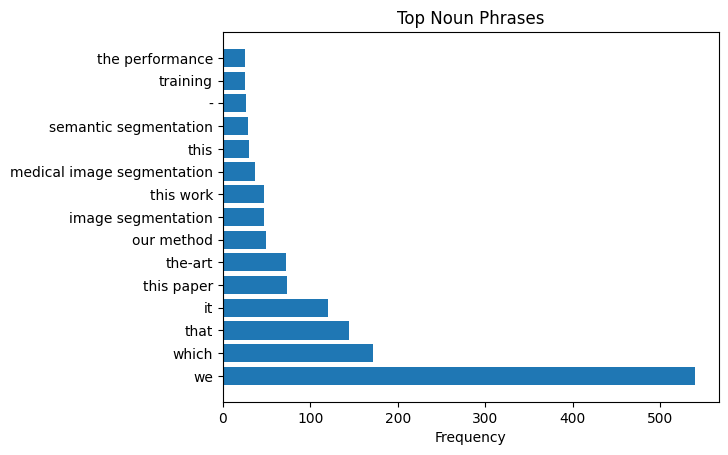

In [14]:
phrases, counts = zip(*top_nps)

plt.figure()
plt.barh(phrases, counts)
plt.xlabel("Frequency")
plt.title("Top Noun Phrases")
plt.show()


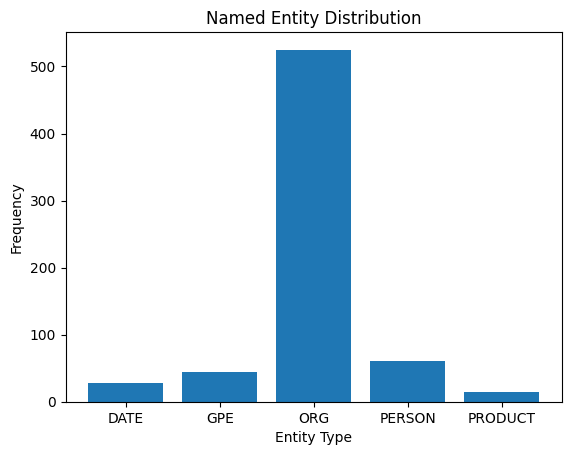

In [15]:
labels = list(entity_freq.keys())
values = list(entity_freq.values())

plt.figure()
plt.bar(labels, values)
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Named Entity Distribution")
plt.show()
